# Multiple layer GRU

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf

In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 68s 172ms/step - loss: 0.4461 - accuracy: 0.7763 - val_loss: 0.3137 - val_accuracy: 0.8771
Epoch 2/10
391/391 [==============================] - 65s 167ms/step - loss: 0.2218 - accuracy: 0.9172 - val_loss: 0.3009 - val_accuracy: 0.8798
Epoch 3/10
391/391 [==============================] - 67s 171ms/step - loss: 0.1689 - accuracy: 0.9394 - val_loss: 0.3309 - val_accuracy: 0.8730
Epoch 4/10
391/391 [==============================] - 70s 178ms/step - loss: 0.1370 - accuracy: 0.9521 - val_loss: 0.3715 - val_accuracy: 0.8680
Epoch 5/10
391/391 [==============================] - 69s 177ms/step - loss: 0.1117 - accuracy: 0.9612 - val_loss: 0.4423 - val_accuracy: 0.8606
Epoch 6/10
391/391 [==============================] - 67s 172ms/step - loss: 0.0934 - accuracy: 0.9684 - val_loss: 0.5407 - val_accuracy: 0.8452
Epoch 7/10
391/391 [==============================] - 60s 152ms/step - loss: 0.0715 - accuracy: 0.9772 - val_loss: 0.6086 - val_ac

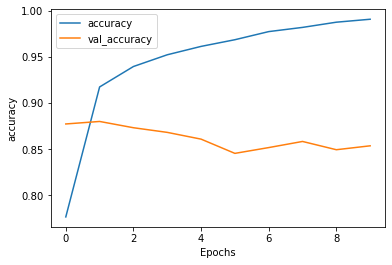

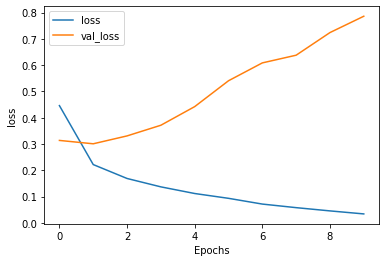

In [7]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')